              Year      Max T      Min T    Rainfall   Humidity  Dry-Bulb T  \
count    24.000000  24.000000  24.000000   24.000000  24.000000   24.000000   
mean   2012.500000  34.239699  19.115856  170.211250  71.895833   26.507753   
std       7.071068   1.073932   1.661663   55.534600   2.224866    1.050349   
min    2001.000000  32.777800  17.675000  110.750000  64.000000   25.708333   
25%    2006.750000  33.631250  18.385417  137.354167  70.687500   25.925000   
50%    2012.500000  34.191667  18.662500  156.166667  72.541667   26.237500   
75%    2018.250000  34.627083  19.156250  187.458333  73.229167   26.537500   
max    2024.000000  38.333300  26.111100  350.000000  75.000000   30.000000   

        Infected      Death  Avg_Precipitation  Avg_Population     Avg_Urban  \
count  24.000000  24.000000          24.000000    2.400000e+01  2.400000e+01   
mean   14.833333  10.458333        2201.927107    1.977284e+08  7.841935e+07   
std    15.666821  11.909000         106.513853  

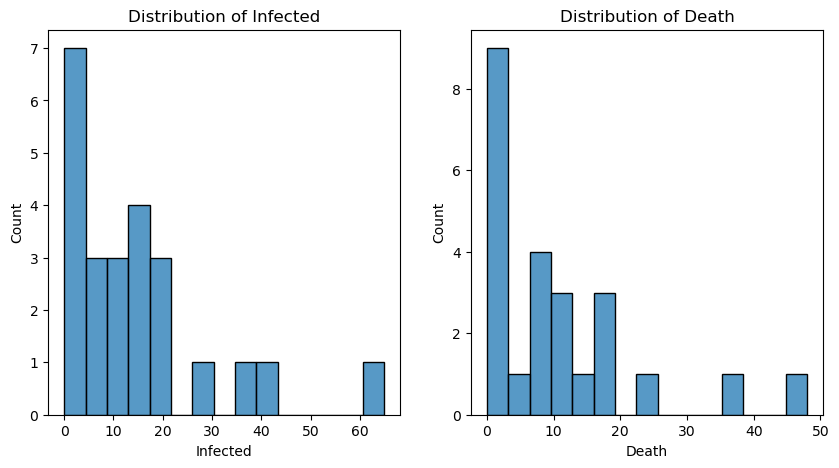

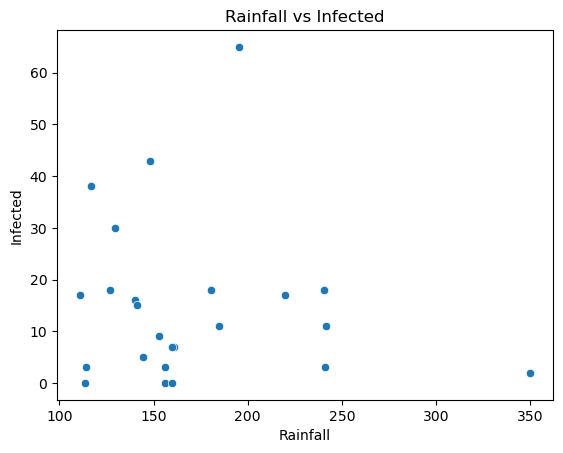

Infected - Mean: 14.833333333333334, Variance: 245.4492753623187
Death - Mean: 10.458333333333334, Variance: 141.82427536231887


In [10]:
#Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('E://Updated_NiV_Dataset_2022_2024.xlsx')

# Descriptive statistics
print(df.describe())

# Visualizations
# Histogram for 'Infected' and 'Death'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Infected'], bins=15, kde=False)
plt.title('Distribution of Infected')

plt.subplot(1, 2, 2)
sns.histplot(df['Death'], bins=15, kde=False)
plt.title('Distribution of Death')

plt.show()

# Scatter plot between Rainfall and Infected
sns.scatterplot(x='Rainfall', y='Infected', data=df)
plt.title('Rainfall vs Infected')
plt.show()

# Mean and variance for overdispersion check
infected_mean = df['Infected'].mean()
infected_variance = df['Infected'].var()
death_mean = df['Death'].mean()
death_variance = df['Death'].var()

print(f"Infected - Mean: {infected_mean}, Variance: {infected_variance}")
print(f"Death - Mean: {death_mean}, Variance: {death_variance}")


In [70]:
# Linear, Quadratic, and Cubic Model Fits

import statsmodels.formula.api as smf
import numpy as np

# Linear model infected 
linear_model = smf.ols(formula='Infected ~ Rainfall + Q("Max T") + Q("Min T") + Humidity', data=df).fit()

# Linear model death
linear_model_2 = smf.ols(formula='Death ~ Rainfall + Q("Max T") + Q("Min T") + Humidity', data=df).fit()

# Quadratic model infected(with squared term for Rainfall and Humidity)
quadratic_model = smf.ols(formula='Infected ~ Rainfall + Q("Max T") + Q("Min T") + Humidity + I(Humidity**2)+ I(Rainfall**2)', data=df).fit()

# Quadratic model death(with squared term for Rainfall and Humidity)
quadratic_model_2 = smf.ols(formula='Death ~ Rainfall + Q("Max T") + Q("Min T") + Humidity + I(Humidity**2)+ I(Rainfall**2)', data=df).fit()

# Cubic model infected(with squared and cubed terms for Rainfall and Death)
cubic_model = smf.ols(formula='Infected ~ Rainfall + Q("Max T") + Q("Min T") + I(Rainfall**2) + I(Rainfall**3) + Humidity + I(Humidity**2) + I(Humidity**3)', data=df).fit()


# Cubic model death(with squared and cubed terms for Rainfall and Death)
cubic_model_2 = smf.ols(formula='Death ~ Rainfall + Q("Max T") + Q("Min T") + I(Rainfall**2) + I(Rainfall**3) + Humidity + I(Humidity**2) + I(Humidity**3)', data=df).fit()


print(linear_model.summary())
print(quadratic_model.summary())
print(cubic_model.summary())

print(linear_model_2.summary())
print(quadratic_model_2.summary())
print(cubic_model_2.summary())




                            OLS Regression Results                            
Dep. Variable:               Infected   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     2.339
Date:                Sat, 12 Oct 2024   Prob (F-statistic):             0.0921
Time:                        12:23:39   Log-Likelihood:                -94.776
No. Observations:                  24   AIC:                             199.6
Df Residuals:                      19   BIC:                             205.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    820.1818    298.182      2.751      0.0

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
from scipy.stats import chi2
warnings.filterwarnings("ignore")

# Fit negative binomial model for "Infected" based on other variables (e.g., 'Rainfall', 'Max T')
infected_model = smf.glm(formula='Infected ~ Rainfall + Q("Max T") + Q("Min T") + Humidity', 
                         data=df, 
                         family=sm.families.NegativeBinomial()).fit()

print(infected_model.summary())

# Fit negative binomial model for "Death"
death_model = smf.glm(formula='Death ~ Rainfall + Q("Max T") + Q("Min T") + Humidity', 
                      data=df, 
                      family=sm.families.NegativeBinomial()).fit()

print(death_model.summary())

# Chi-square goodness-of-fit test


# Deviance residuals and degrees of freedom for the infected model
infected_deviance = infected_model.deviance
infected_df_resid = infected_model.df_resid

# Compute p-value for infected model
infected_p_value = 1 - chi2.cdf(infected_deviance, infected_df_resid)
print(f'Chi-square goodness-of-fit test for infected model: p-value = {infected_p_value}')

# For death model
death_deviance = death_model.deviance
death_df_resid = death_model.df_resid

# Compute p-value for death model
death_p_value = 1 - chi2.cdf(death_deviance, death_df_resid)
print(f'Chi-square goodness-of-fit test for death model: p-value = {death_p_value}')


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Infected   No. Observations:                   24
Model:                            GLM   Df Residuals:                       19
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84.283
Date:                Sat, 12 Oct 2024   Deviance:                       21.430
Time:                        11:16:37   Pearson chi2:                     11.9
No. Iterations:                    14   Pseudo R-squ. (CS):             0.3535
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.9641     23.428      2.431      0.0

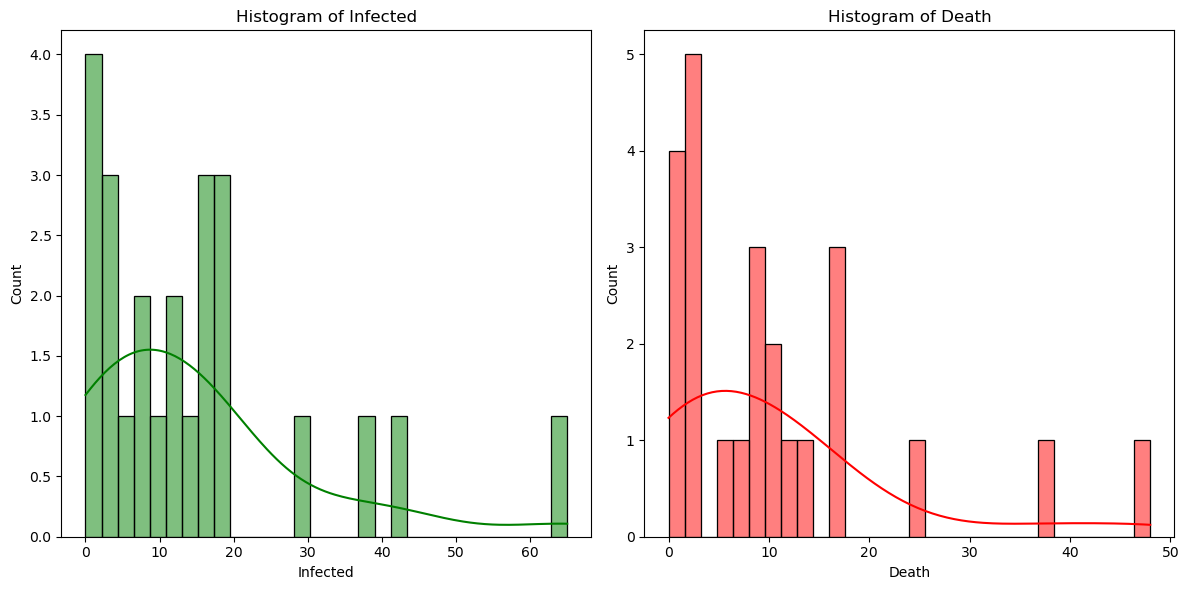

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for Infected and Death
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Infected'], kde=True, color='green', bins=30)
plt.title('Histogram of Infected')

plt.subplot(1, 2, 2)
sns.histplot(df['Death'], kde=True, color='red', bins=30)
plt.title('Histogram of Death')

plt.tight_layout()
plt.show()


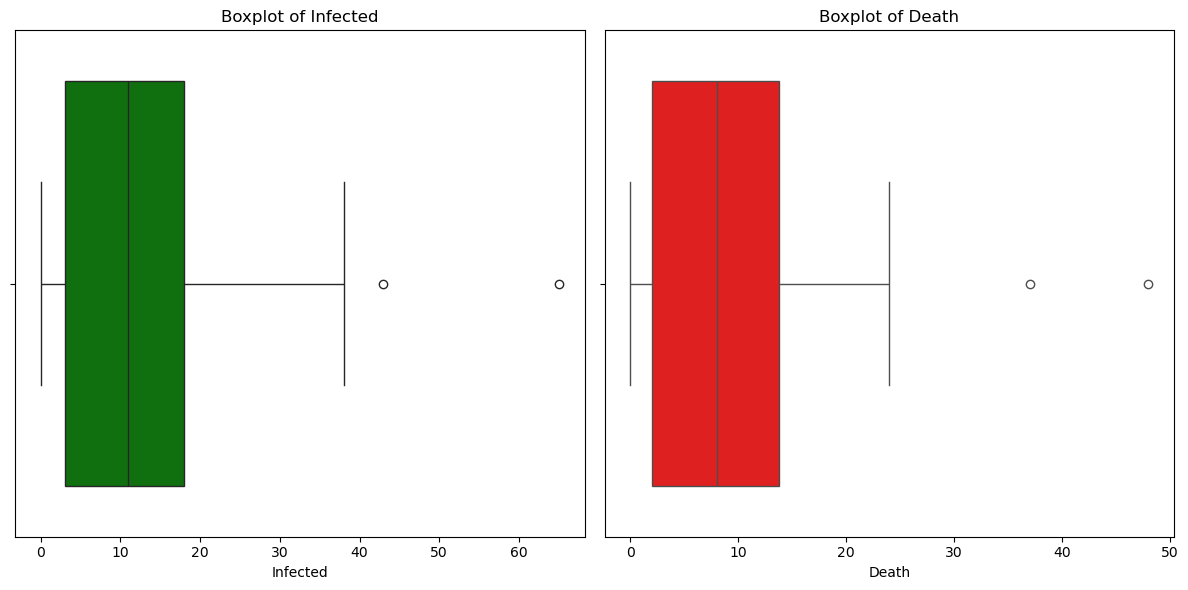

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Infected'], color='green')
plt.title('Boxplot of Infected')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Death'], color='red')
plt.title('Boxplot of Death')

plt.tight_layout()
plt.show()


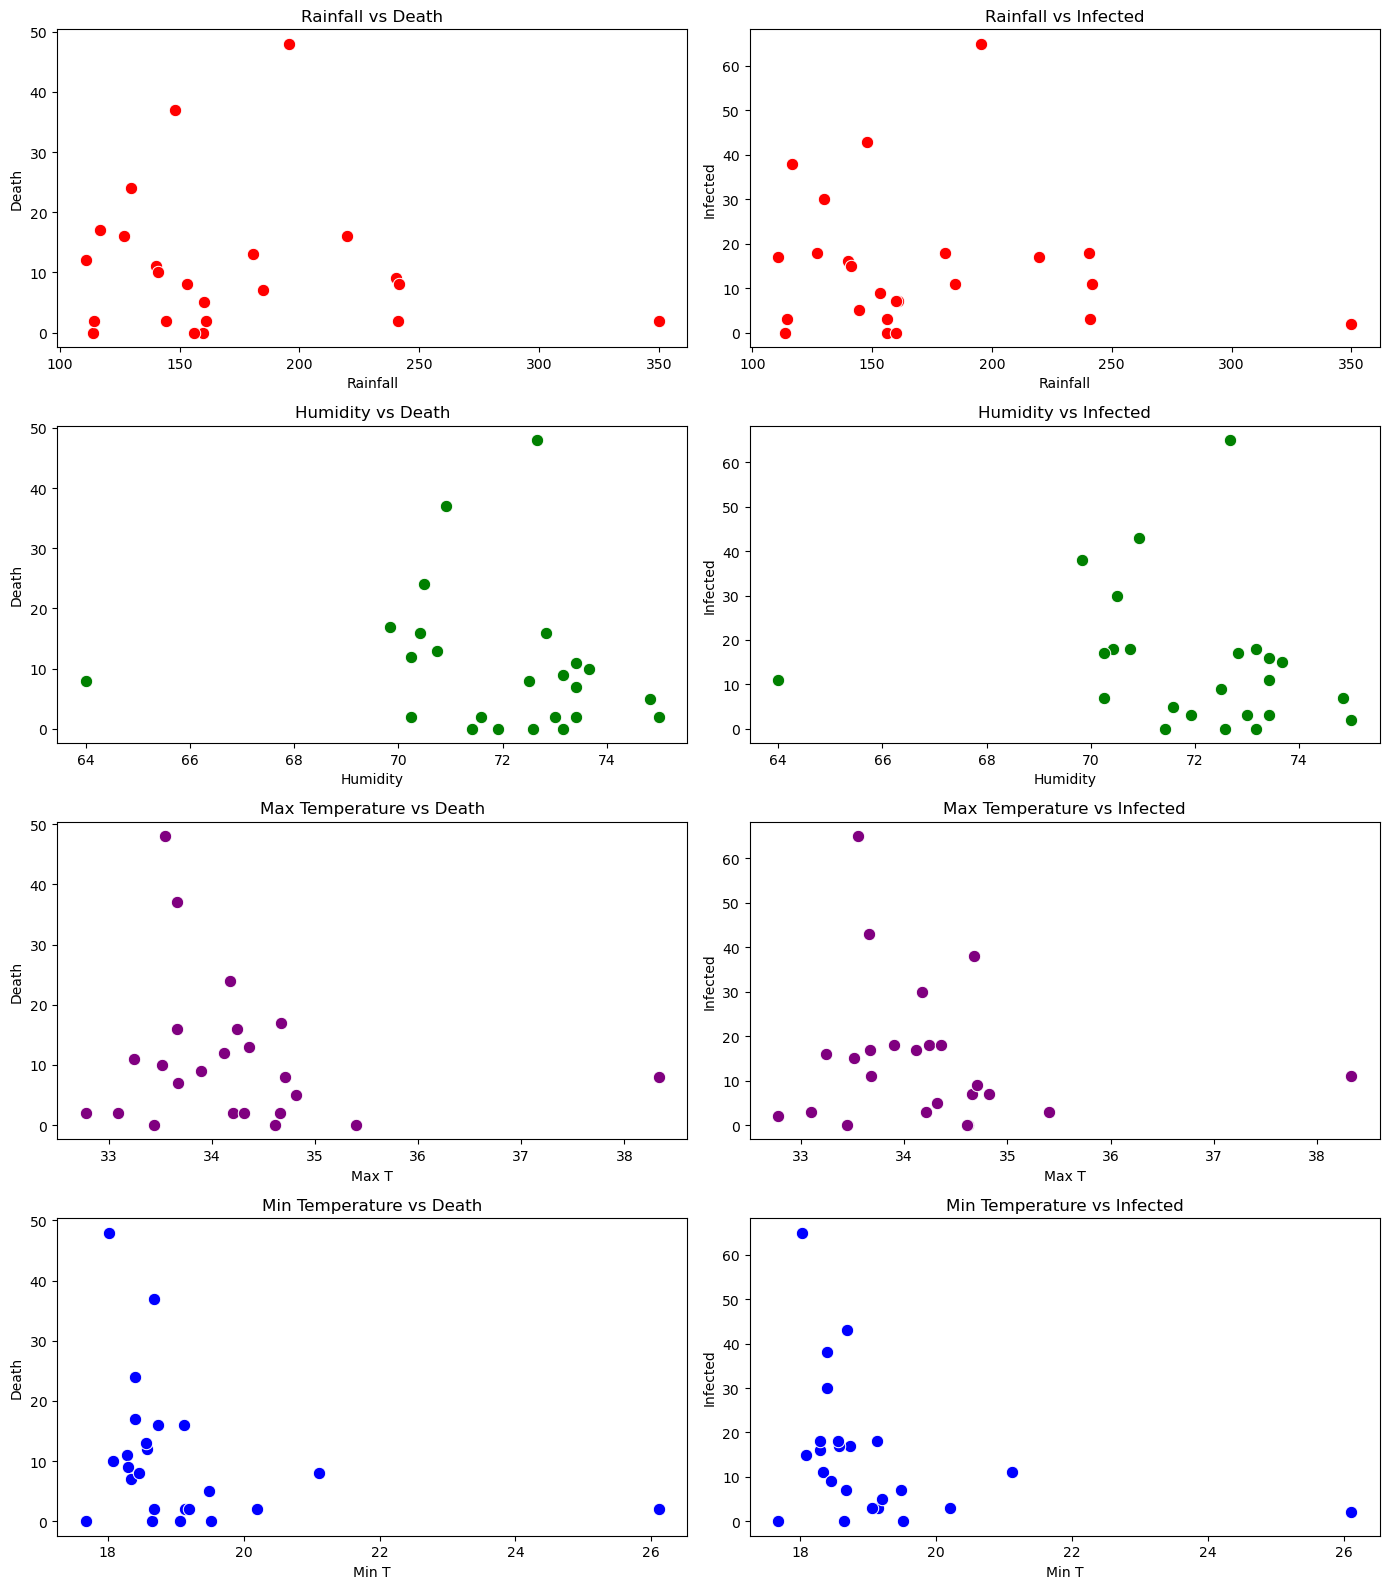

In [58]:
plt.figure(figsize=(14, 16))  # Adjust the figsize to fit 8 plots

# Scatter plot for Rainfall vs Death
plt.subplot(4, 2, 1)
sns.scatterplot(x=df['Rainfall'], y=df['Death'], color='red', s=80)  
plt.title('Rainfall vs Death')

# Scatter plot for Rainfall vs Infected
plt.subplot(4, 2, 2)
sns.scatterplot(x=df['Rainfall'], y=df['Infected'], color='red', s=80)  
plt.title('Rainfall vs Infected')

# Scatter plot for Humidity vs Death
plt.subplot(4, 2, 3)
sns.scatterplot(x=df['Humidity'], y=df['Death'], color='green', s=80)  
plt.title('Humidity vs Death')

# Scatter plot for Humidity vs Infected
plt.subplot(4, 2, 4)
sns.scatterplot(x=df['Humidity'], y=df['Infected'], color='green', s=80)  
plt.title('Humidity vs Infected')

# Scatter plot for Max Temperature vs Death
plt.subplot(4, 2, 5)
sns.scatterplot(x=df['Max T'], y=df['Death'], color='purple', s=80)  
plt.title('Max Temperature vs Death')

# Scatter plot for Max Temperature vs Infected
plt.subplot(4, 2, 6)
sns.scatterplot(x=df['Max T'], y=df['Infected'], color='purple', s=80) 
plt.title('Max Temperature vs Infected')

# Scatter plot for Min Temperature vs Death
plt.subplot(4, 2, 7)
sns.scatterplot(x=df['Min T'], y=df['Death'], color='blue', s=80)  
plt.title('Min Temperature vs Death')

# Scatter plot for Min Temperature vs Infected
plt.subplot(4, 2, 8)
sns.scatterplot(x=df['Min T'], y=df['Infected'], color='blue', s=80)  
plt.title('Min Temperature vs Infected')



plt.tight_layout()
plt.show()


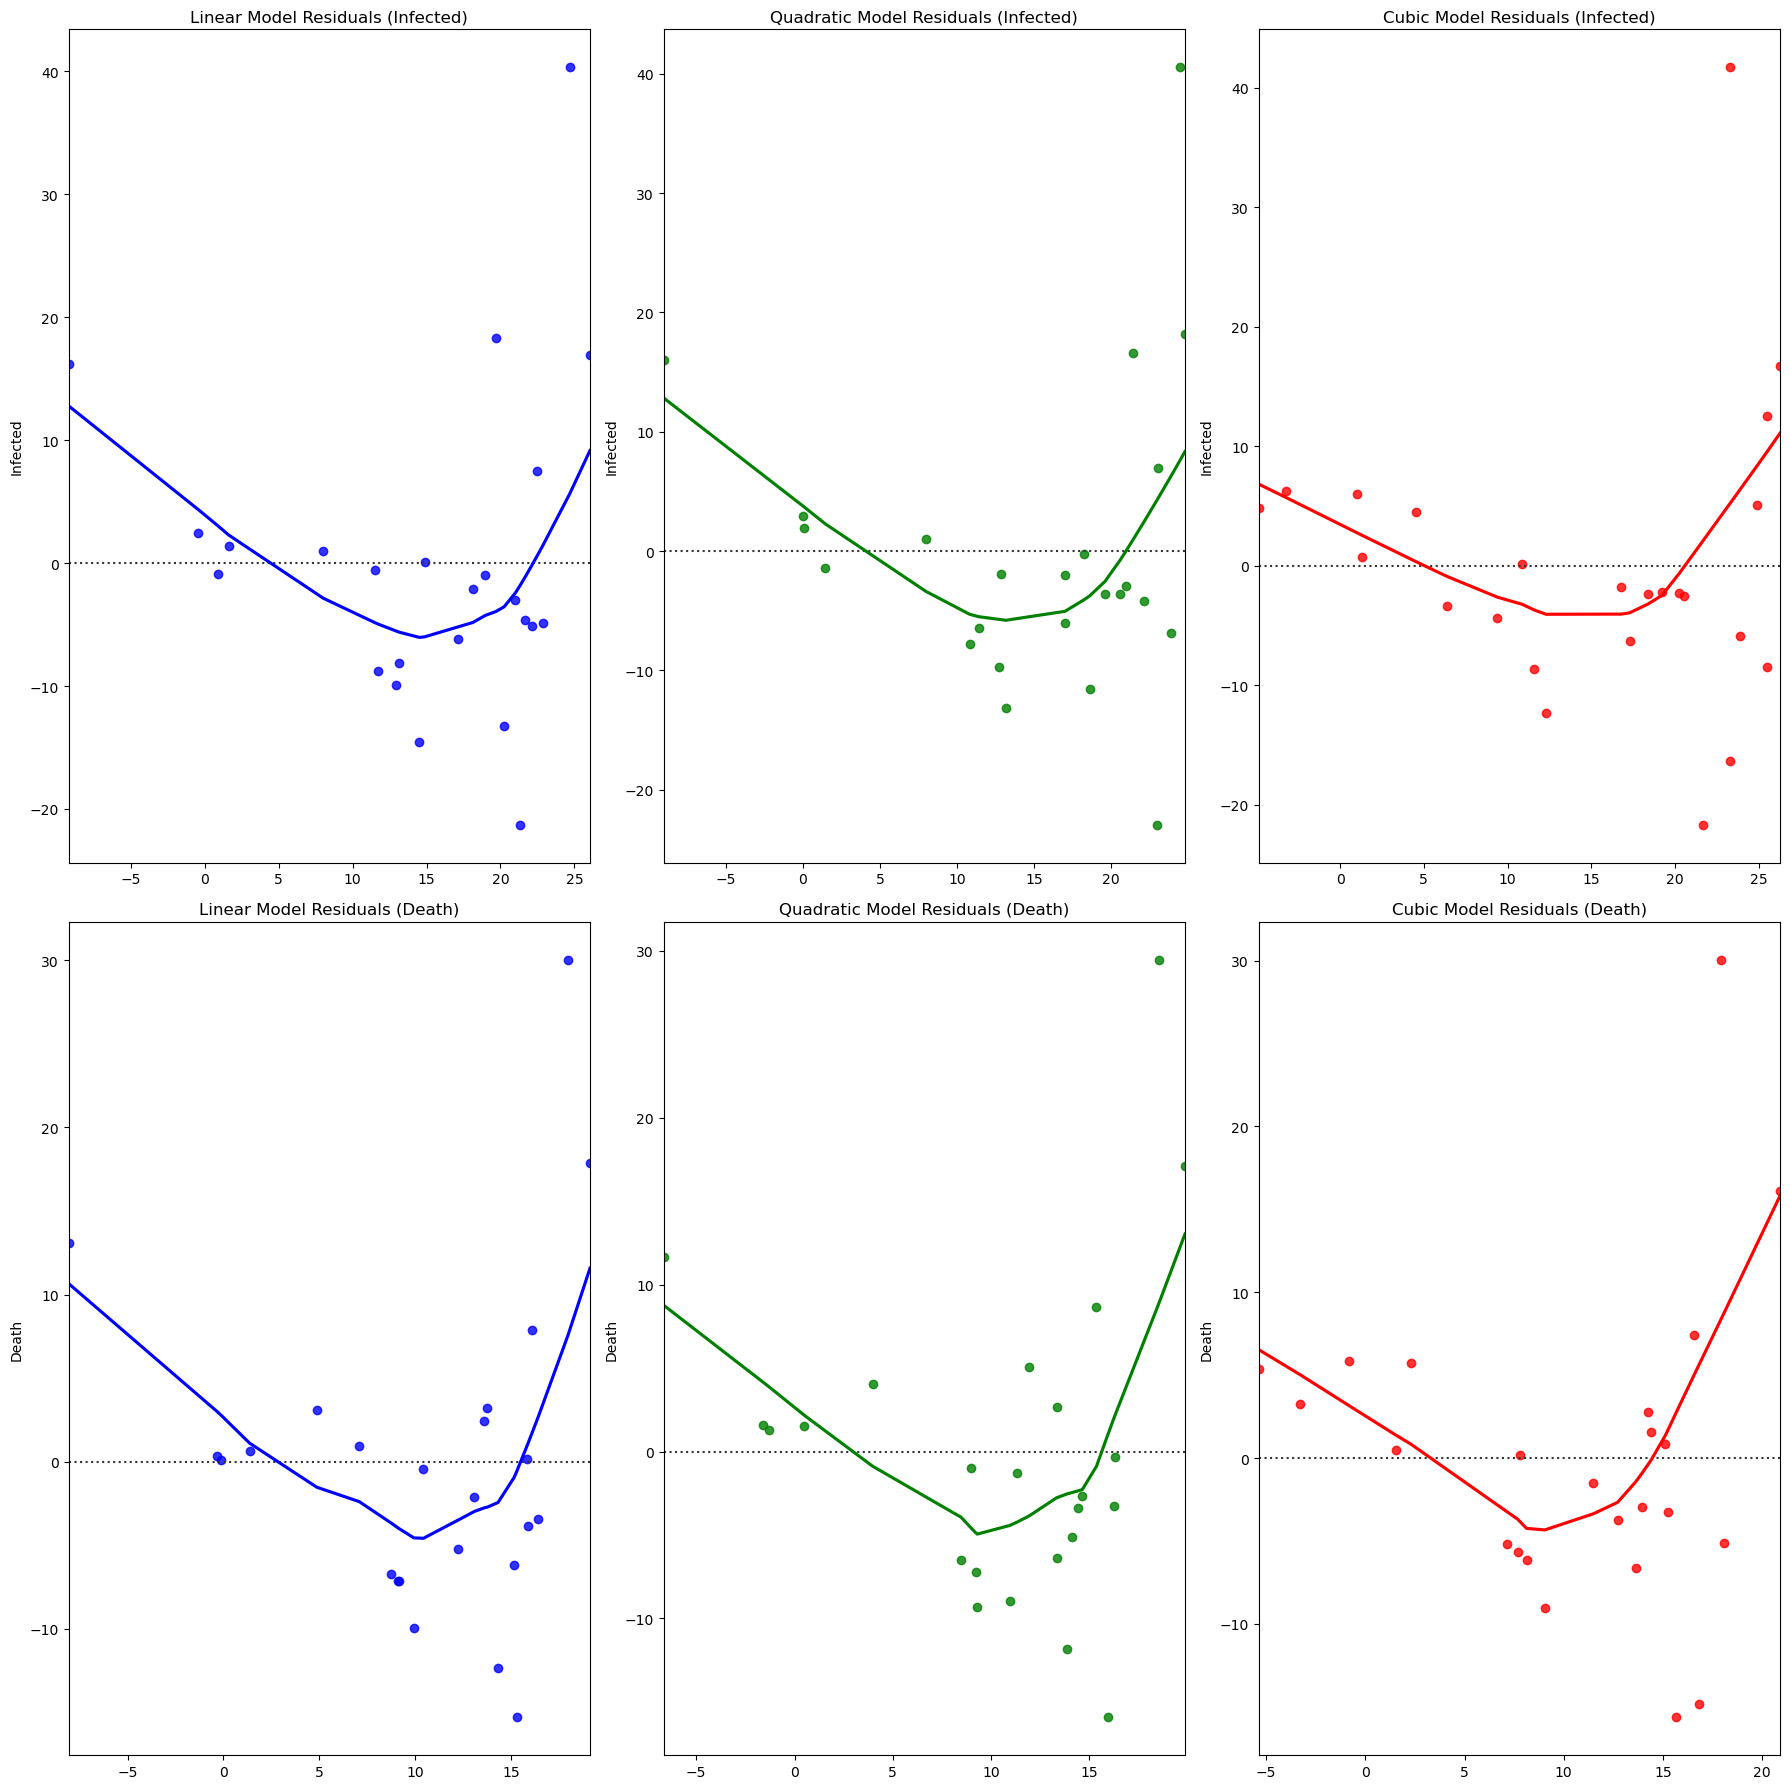

In [82]:
# Residual plots for Linear, Quadratic, and Cubic models (Infected)
plt.figure(figsize=(18, 18))

# For Linear Model (Infected)
plt.subplot(2, 3, 1)
sns.residplot(x=linear_model.fittedvalues, y=df['Infected'], lowess=True, color='blue')
plt.title('Linear Model Residuals (Infected)')

# For Quadratic Model (Infected)
plt.subplot(2, 3, 2)
sns.residplot(x=quadratic_model.fittedvalues, y=df['Infected'], lowess=True, color='green')
plt.title('Quadratic Model Residuals (Infected)')

# For Cubic Model (Infected)
plt.subplot(2, 3, 3)
sns.residplot(x=cubic_model.fittedvalues, y=df['Infected'], lowess=True, color='red')
plt.title('Cubic Model Residuals (Infected)')



# For Linear Model (Death)
plt.subplot(2, 3, 4)
sns.residplot(x=linear_model_2.fittedvalues, y=df['Death'], lowess=True, color='blue')
plt.title('Linear Model Residuals (Death)')

# For Quadratic Model (Death)
plt.subplot(2, 3, 5)
sns.residplot(x=quadratic_model_2.fittedvalues, y=df['Death'], lowess=True, color='green')
plt.title('Quadratic Model Residuals (Death)')

# For Cubic Model (Death)
plt.subplot(2, 3, 6)
sns.residplot(x=cubic_model_2.fittedvalues, y=df['Death'], lowess=True, color='red')
plt.title('Cubic Model Residuals (Death)')

plt.tight_layout()
plt.show()


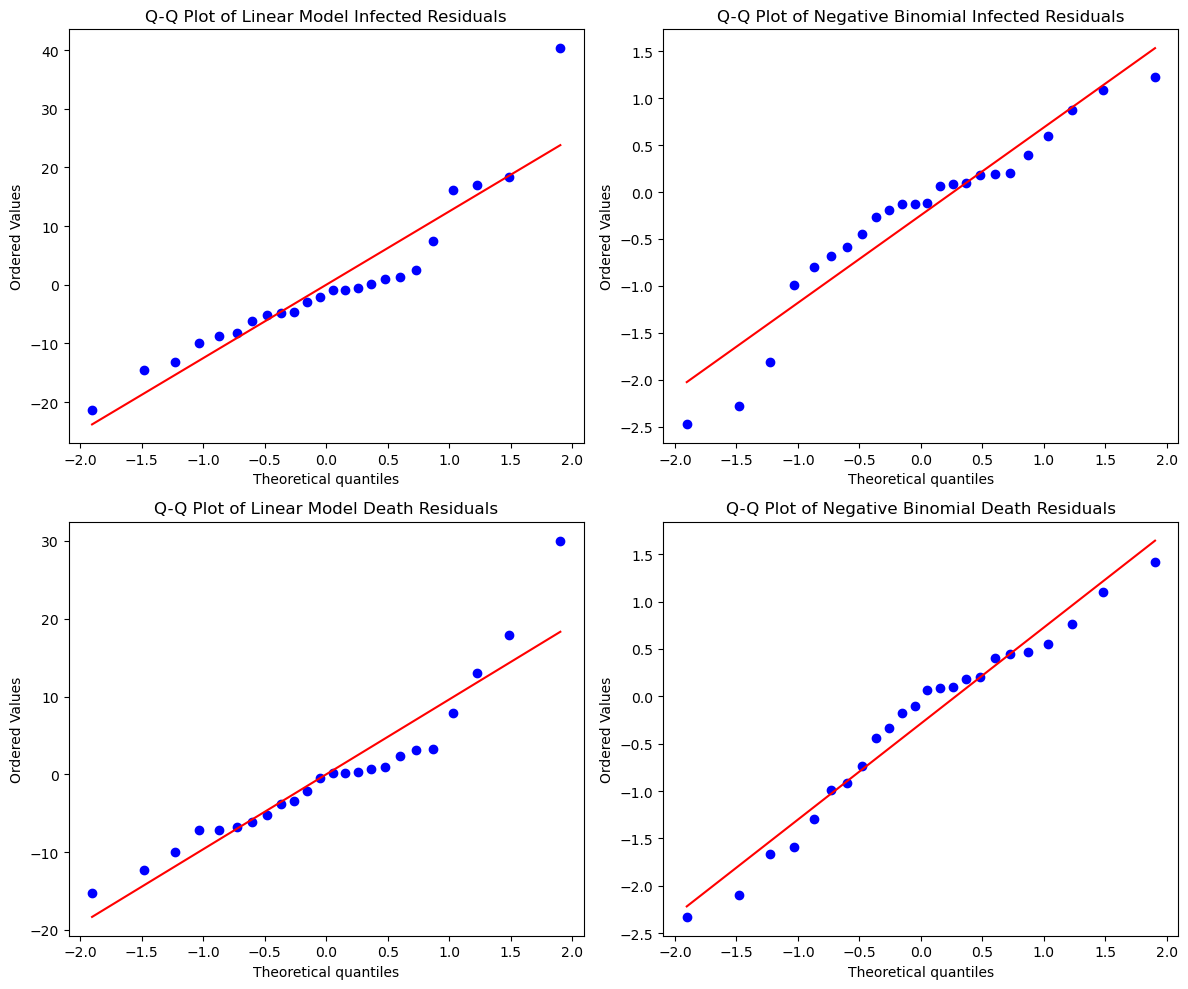

In [94]:
import scipy.stats as stats


plt.figure(figsize=(12, 10))
# Q-Q plot for Linear Model (Infected) residuals
plt.subplot(2, 2, 1)
stats.probplot(linear_model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Linear Model Infected Residuals')

# Q-Q plot for Negative Binomial Infected model residuals
plt.subplot(2, 2, 2)
stats.probplot(infected_model.resid_deviance, dist="norm", plot=plt)
plt.title('Q-Q Plot of Negative Binomial Infected Residuals')

# Q-Q plot for Linear Model (Death) residuals
plt.subplot(2, 2, 3)
stats.probplot(linear_model_2.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Linear Model Death Residuals')

# Q-Q plot for Negative Binomial Death model residuals
plt.subplot(2, 2, 4)
stats.probplot(death_model.resid_deviance, dist="norm", plot=plt)
plt.title('Q-Q Plot of Negative Binomial Death Residuals')

plt.tight_layout()
plt.show()


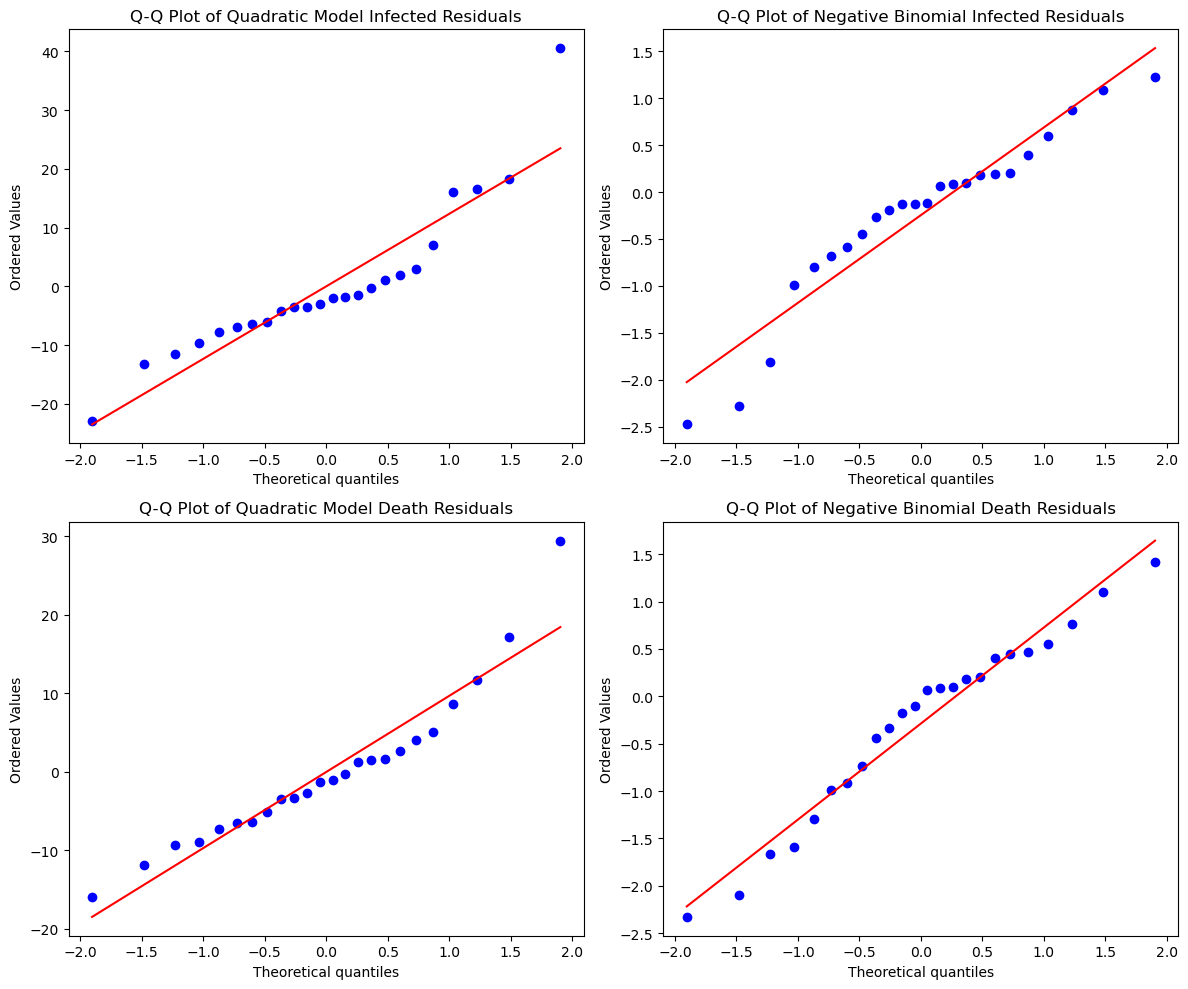

In [96]:
plt.figure(figsize=(12, 10))
# Q-Q plot for Quadratic Model (Infected) residuals
plt.subplot(2, 2, 1)
stats.probplot(quadratic_model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Quadratic Model Infected Residuals')

# Q-Q plot for Negative Binomial Infected model residuals
plt.subplot(2, 2, 2)
stats.probplot(infected_model.resid_deviance, dist="norm", plot=plt)
plt.title('Q-Q Plot of Negative Binomial Infected Residuals')

# Q-Q plot for Quadratic Model (Death) residuals
plt.subplot(2, 2, 3)
stats.probplot(quadratic_model_2.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Quadratic Model Death Residuals')

# Q-Q plot for Negative Binomial Death model residuals
plt.subplot(2, 2, 4)
stats.probplot(death_model.resid_deviance, dist="norm", plot=plt)
plt.title('Q-Q Plot of Negative Binomial Death Residuals')

plt.tight_layout()
plt.show()

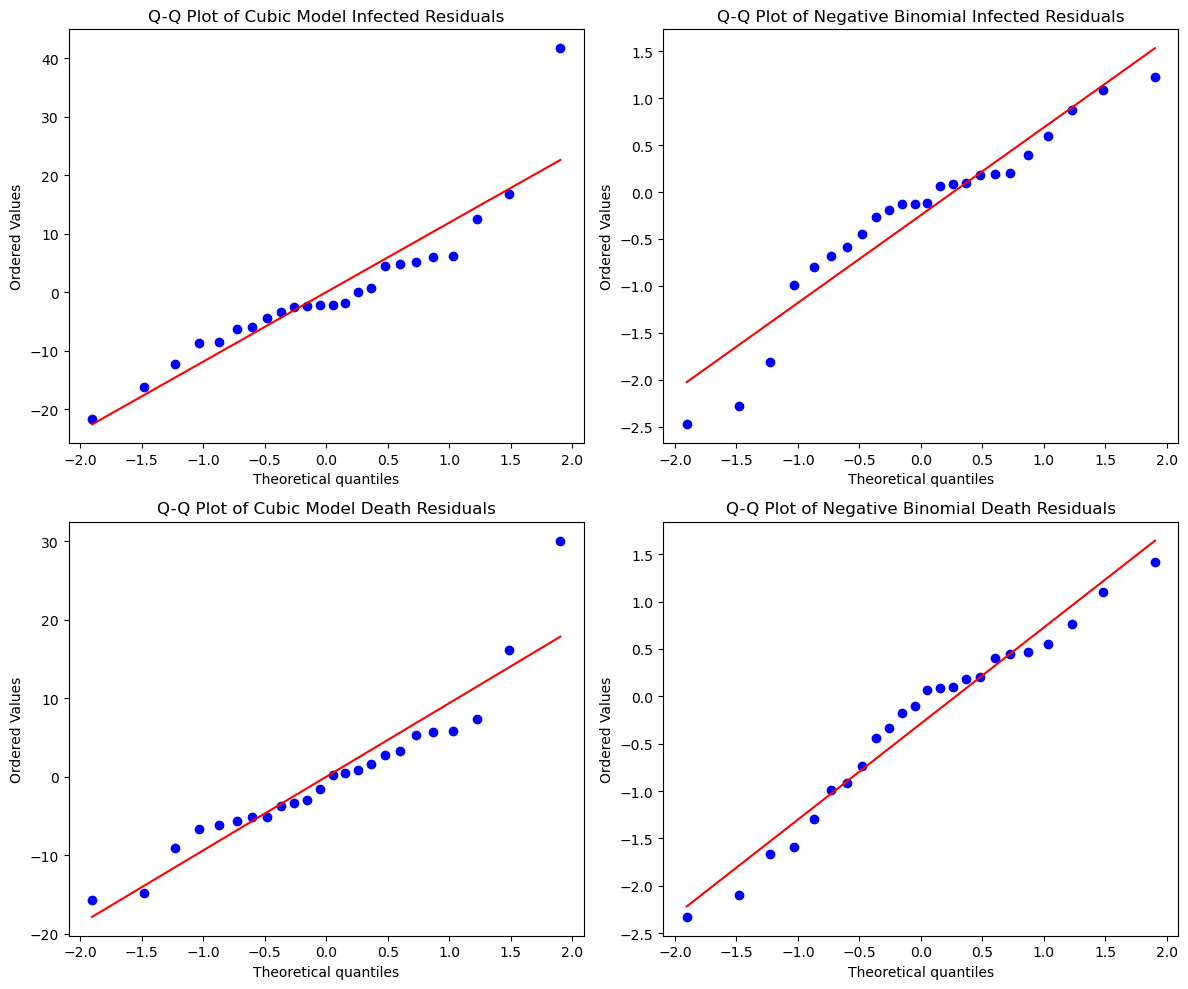

In [98]:
plt.figure(figsize=(12, 10))
# Q-Q plot for cubic Model (Infected) residuals
plt.subplot(2, 2, 1)
stats.probplot(cubic_model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Cubic Model Infected Residuals')

# Q-Q plot for Negative Binomial Infected model residuals
plt.subplot(2, 2, 2)
stats.probplot(infected_model.resid_deviance, dist="norm", plot=plt)
plt.title('Q-Q Plot of Negative Binomial Infected Residuals')

# Q-Q plot for cubic Model (Death) residuals
plt.subplot(2, 2, 3)
stats.probplot(cubic_model_2.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Cubic Model Death Residuals')

# Q-Q plot for Negative Binomial Death model residuals
plt.subplot(2, 2, 4)
stats.probplot(death_model.resid_deviance, dist="norm", plot=plt)
plt.title('Q-Q Plot of Negative Binomial Death Residuals')

plt.tight_layout()
plt.show()

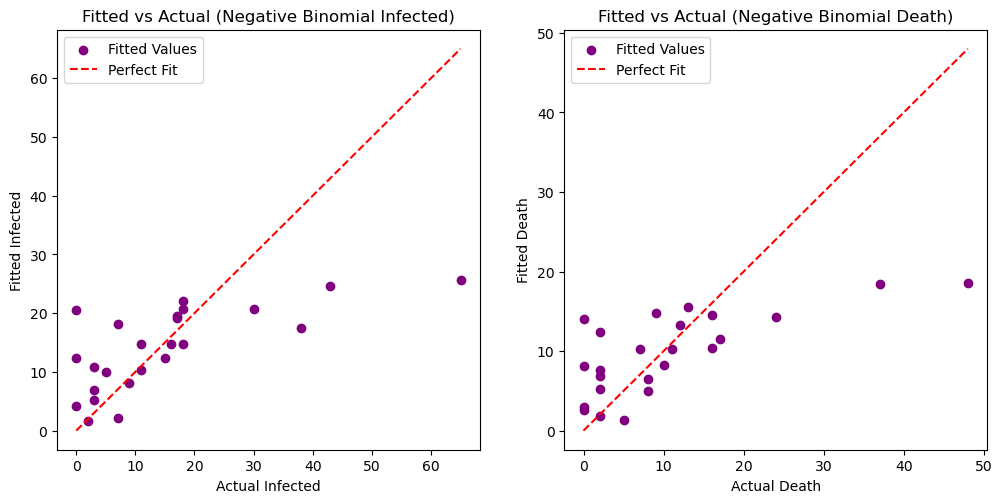

In [114]:
# Fitted vs Actual for Negative Binomial Infected Model
plt.figure(figsize=(12, 12))

plt.subplot(2,2,1)

# Scatter plot for fitted values
plt.scatter(df['Infected'], infected_model.fittedvalues, color='purple', label='Fitted Values')

# Reference line for perfect fit
plt.plot([min(df['Infected']), max(df['Infected'])], 
                    [min(df['Infected']), max(df['Infected'])], 
                    color='red', linestyle='--', label='Perfect Fit')

# Adding title and labels
plt.title('Fitted vs Actual (Negative Binomial Infected)')
plt.xlabel('Actual Infected')
plt.ylabel('Fitted Infected')

# Adding legends
plt.legend(loc='best')

plt.subplot(2,2,2)

# Scatter plot for fitted values
plt.scatter(df['Death'], death_model.fittedvalues, color='purple', label='Fitted Values')

# Reference line for perfect fit
plt.plot([min(df['Death']), max(df['Death'])], 
                    [min(df['Death']), max(df['Death'])], 
                    color='red', linestyle='--', label='Perfect Fit')

# Adding title and labels
plt.title('Fitted vs Actual (Negative Binomial Death)')
plt.xlabel('Actual Death')
plt.ylabel('Fitted Death')

# Adding legends
plt.legend(loc='best')

# Display the plot
plt.show()


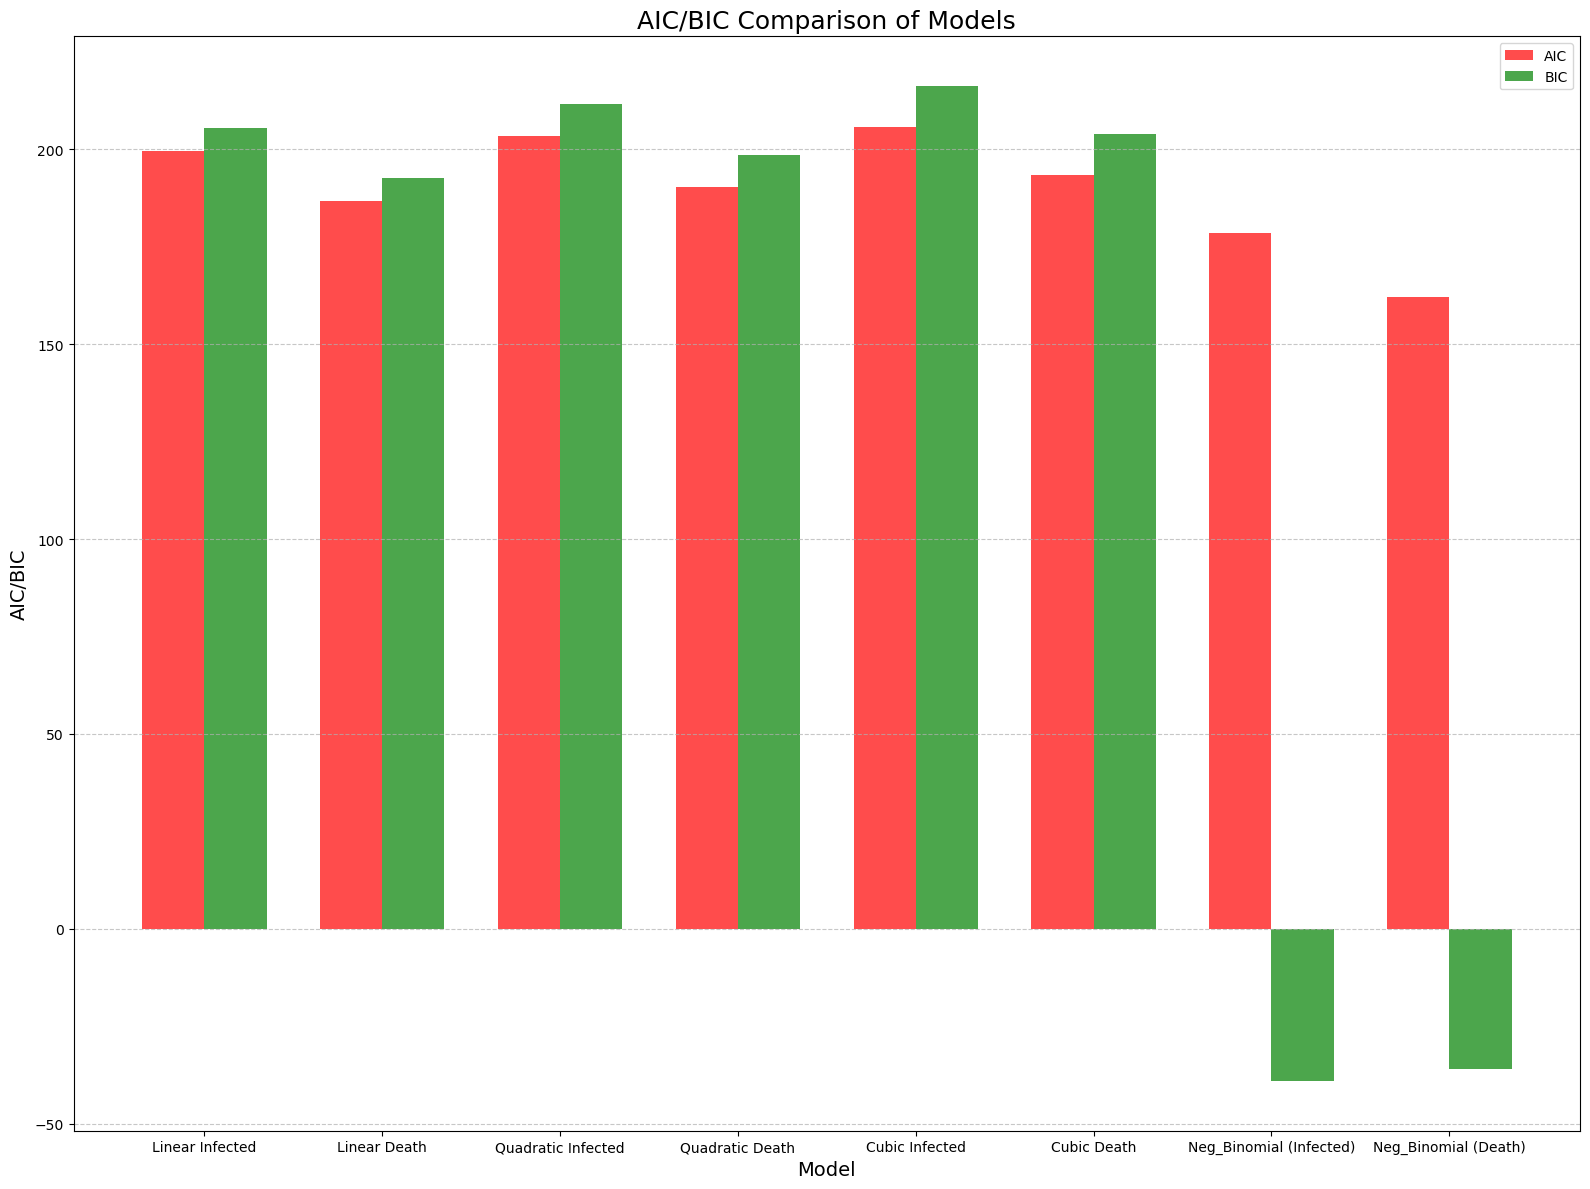

In [142]:
import numpy as np

# Models and their respective AIC and BIC values
models = ['Linear Infected', 'Linear Death', 'Quadratic Infected', 'Quadratic Death', 'Cubic Infected', 'Cubic Death', 'Neg_Binomial (Infected)', 'Neg_Binomial (Death)']
aic_values = [linear_model.aic, linear_model_2.aic, quadratic_model.aic, quadratic_model_2.aic, cubic_model.aic,  cubic_model_2.aic, infected_model.aic, death_model.aic]
bic_values = [linear_model.bic, linear_model_2.bic, quadratic_model.bic, quadratic_model_2.bic, cubic_model.bic, cubic_model_2.bic, infected_model.bic, death_model.bic]

# Bar width and positions
bar_width = 0.35
x = np.arange(len(models))

# Create bar plot
plt.figure(figsize=(16, 12))
bars1 = plt.bar(x - bar_width/2, aic_values, width=bar_width, alpha=0.7, label='AIC', color='red')
bars2 = plt.bar(x + bar_width/2, bic_values, width=bar_width, alpha=0.7, label='BIC', color='green')

# Adding title and labels
plt.xlabel('Model', fontsize=14)
plt.ylabel('AIC/BIC', fontsize=14)
plt.title('AIC/BIC Comparison of Models', fontsize=18)
plt.xticks(x, models)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a legend
plt.legend()

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


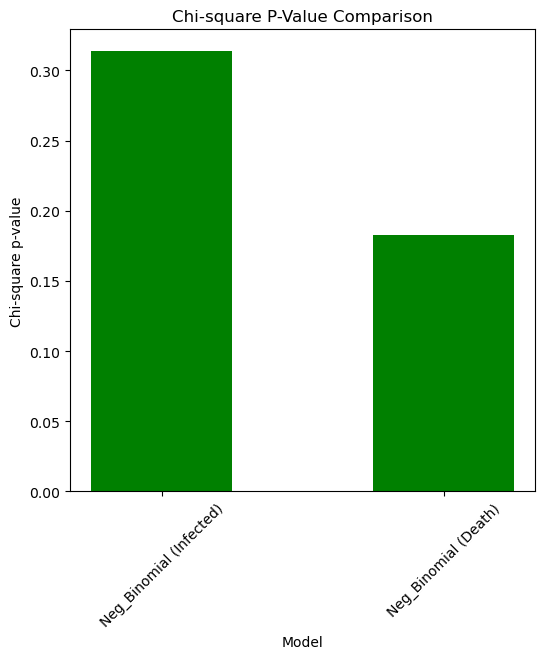

In [166]:
chi2_values = [infected_p_value, death_p_value]

# Bar plot for Chi-square p-values
plt.figure(figsize=(6, 6))
plt.bar([models[6], models[7]], chi2_values, color='green', width=0.5)
plt.xlabel('Model')
plt.ylabel('Chi-square p-value')
plt.title('Chi-square P-Value Comparison')
plt.xticks(rotation=45)
plt.show()


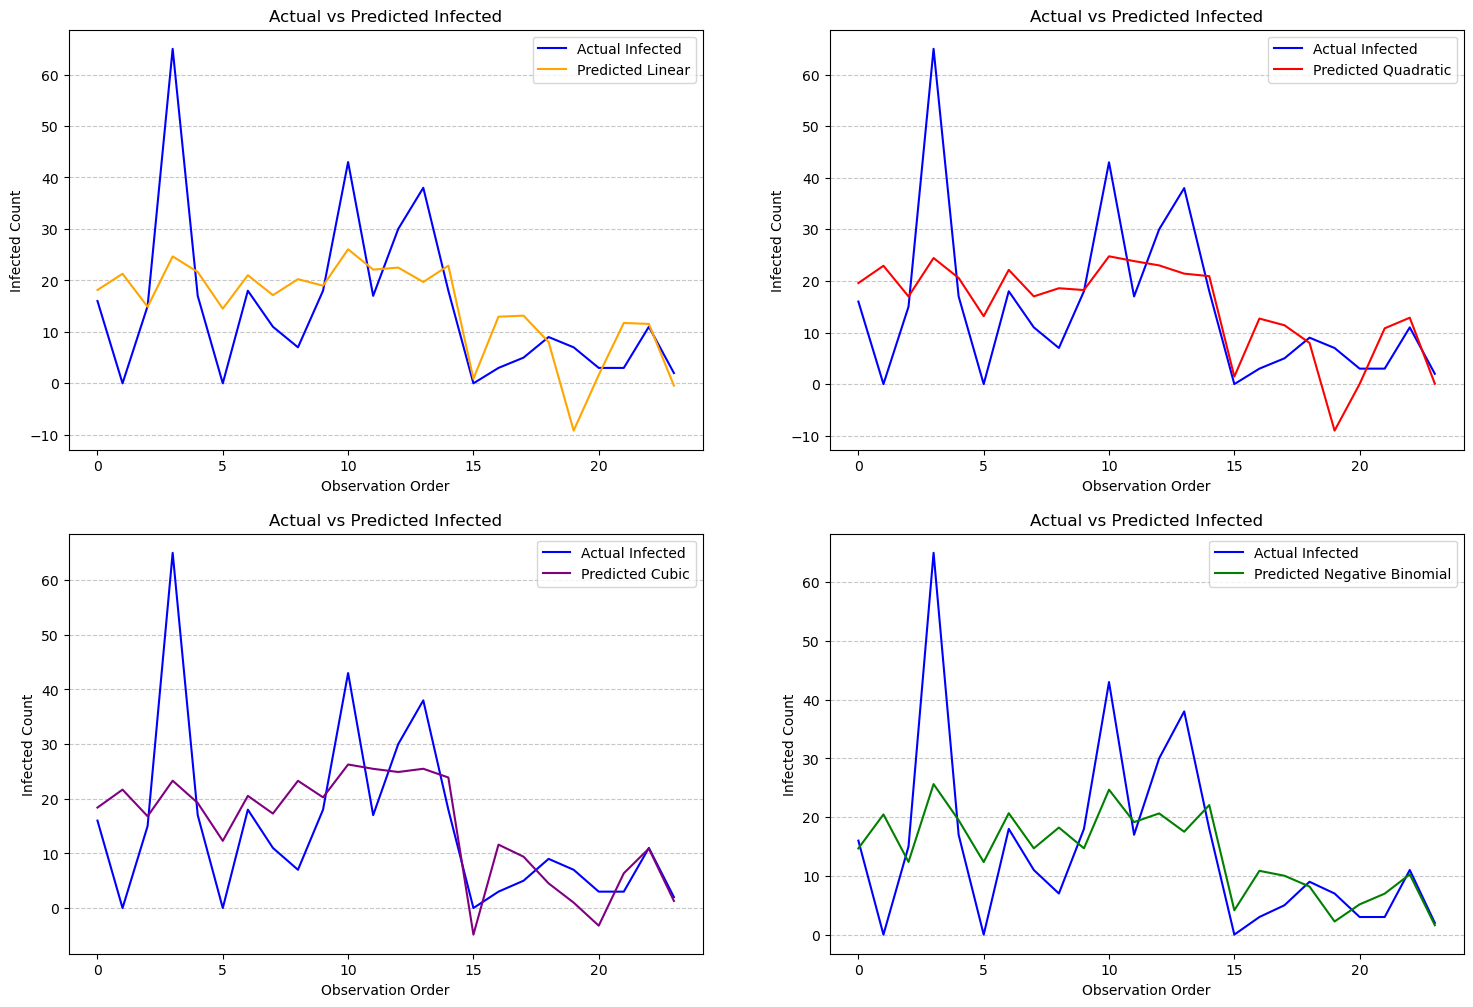

In [184]:
plt.figure(figsize=(18, 12))

# For Linear Model
plt.subplot(2,2,1)
plt.plot(df['Infected'], label='Actual Infected', color='blue')
plt.plot(linear_model.fittedvalues, label='Predicted Linear', color='orange')
plt.title('Actual vs Predicted Infected')
plt.xlabel('Observation Order')
plt.ylabel('Infected Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# For quadratic Model
plt.subplot(2,2,2)
plt.plot(df['Infected'], label='Actual Infected', color='blue')
plt.plot(quadratic_model.fittedvalues, label='Predicted Quadratic', color='red')
plt.title('Actual vs Predicted Infected')
plt.xlabel('Observation Order')
plt.ylabel('Infected Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# For cubic Model
plt.subplot(2,2,3)
plt.plot(df['Infected'], label='Actual Infected', color='blue')
plt.plot(cubic_model.fittedvalues, label='Predicted Cubic', color='purple')
plt.title('Actual vs Predicted Infected')
plt.xlabel('Observation Order')
plt.ylabel('Infected Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# For Negative Binomial Infected Model
plt.subplot(2,2,4)
plt.plot(df['Infected'], label='Actual Infected', color='blue')
plt.plot(infected_model.fittedvalues, label='Predicted Negative Binomial', color='green')

plt.title('Actual vs Predicted Infected')
plt.xlabel('Observation Order')
plt.ylabel('Infected Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


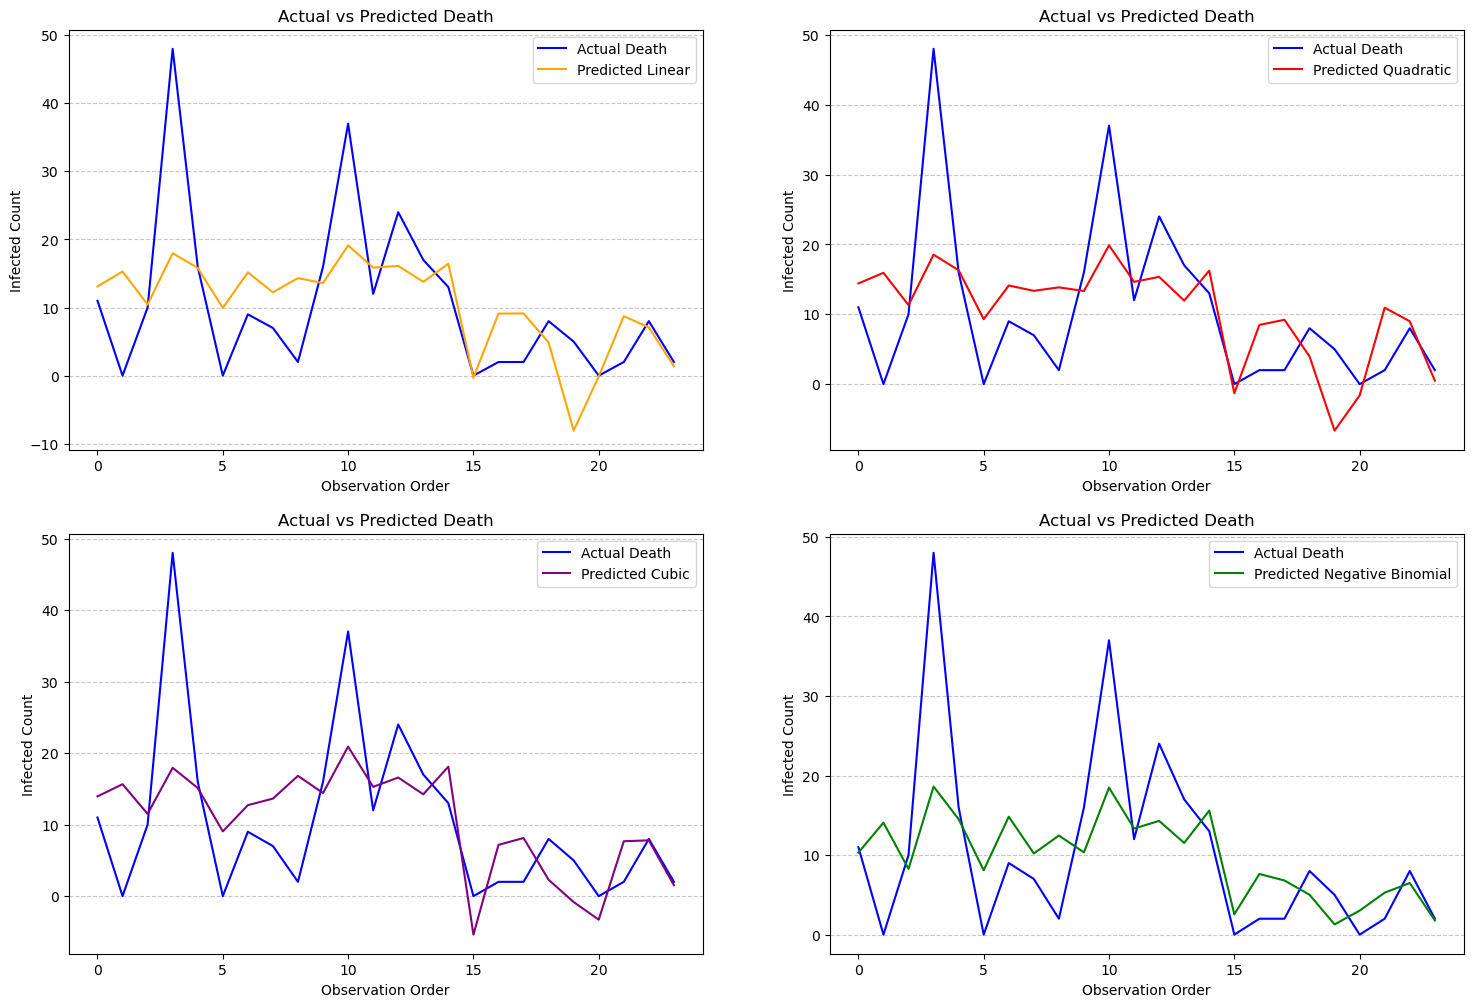

In [186]:
plt.figure(figsize=(18, 12))

# For Linear Model
plt.subplot(2,2,1)
plt.plot(df['Death'], label='Actual Death', color='blue')
plt.plot(linear_model_2.fittedvalues, label='Predicted Linear', color='orange')
plt.title('Actual vs Predicted Death')
plt.xlabel('Observation Order')
plt.ylabel('Infected Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# For quadratic Model
plt.subplot(2,2,2)
plt.plot(df['Death'], label='Actual Death', color='blue')
plt.plot(quadratic_model_2.fittedvalues, label='Predicted Quadratic', color='red')
plt.title('Actual vs Predicted Death')
plt.xlabel('Observation Order')
plt.ylabel('Infected Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# For cubic Model
plt.subplot(2,2,3)
plt.plot(df['Death'], label='Actual Death', color='blue')
plt.plot(cubic_model_2.fittedvalues, label='Predicted Cubic', color='purple')
plt.title('Actual vs Predicted Death')
plt.xlabel('Observation Order')
plt.ylabel('Infected Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# For Negative Binomial Infected Model
plt.subplot(2,2,4)
plt.plot(df['Death'], label='Actual Death', color='blue')
plt.plot(death_model.fittedvalues, label='Predicted Negative Binomial', color='green')

plt.title('Actual vs Predicted Death')
plt.xlabel('Observation Order')
plt.ylabel('Infected Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


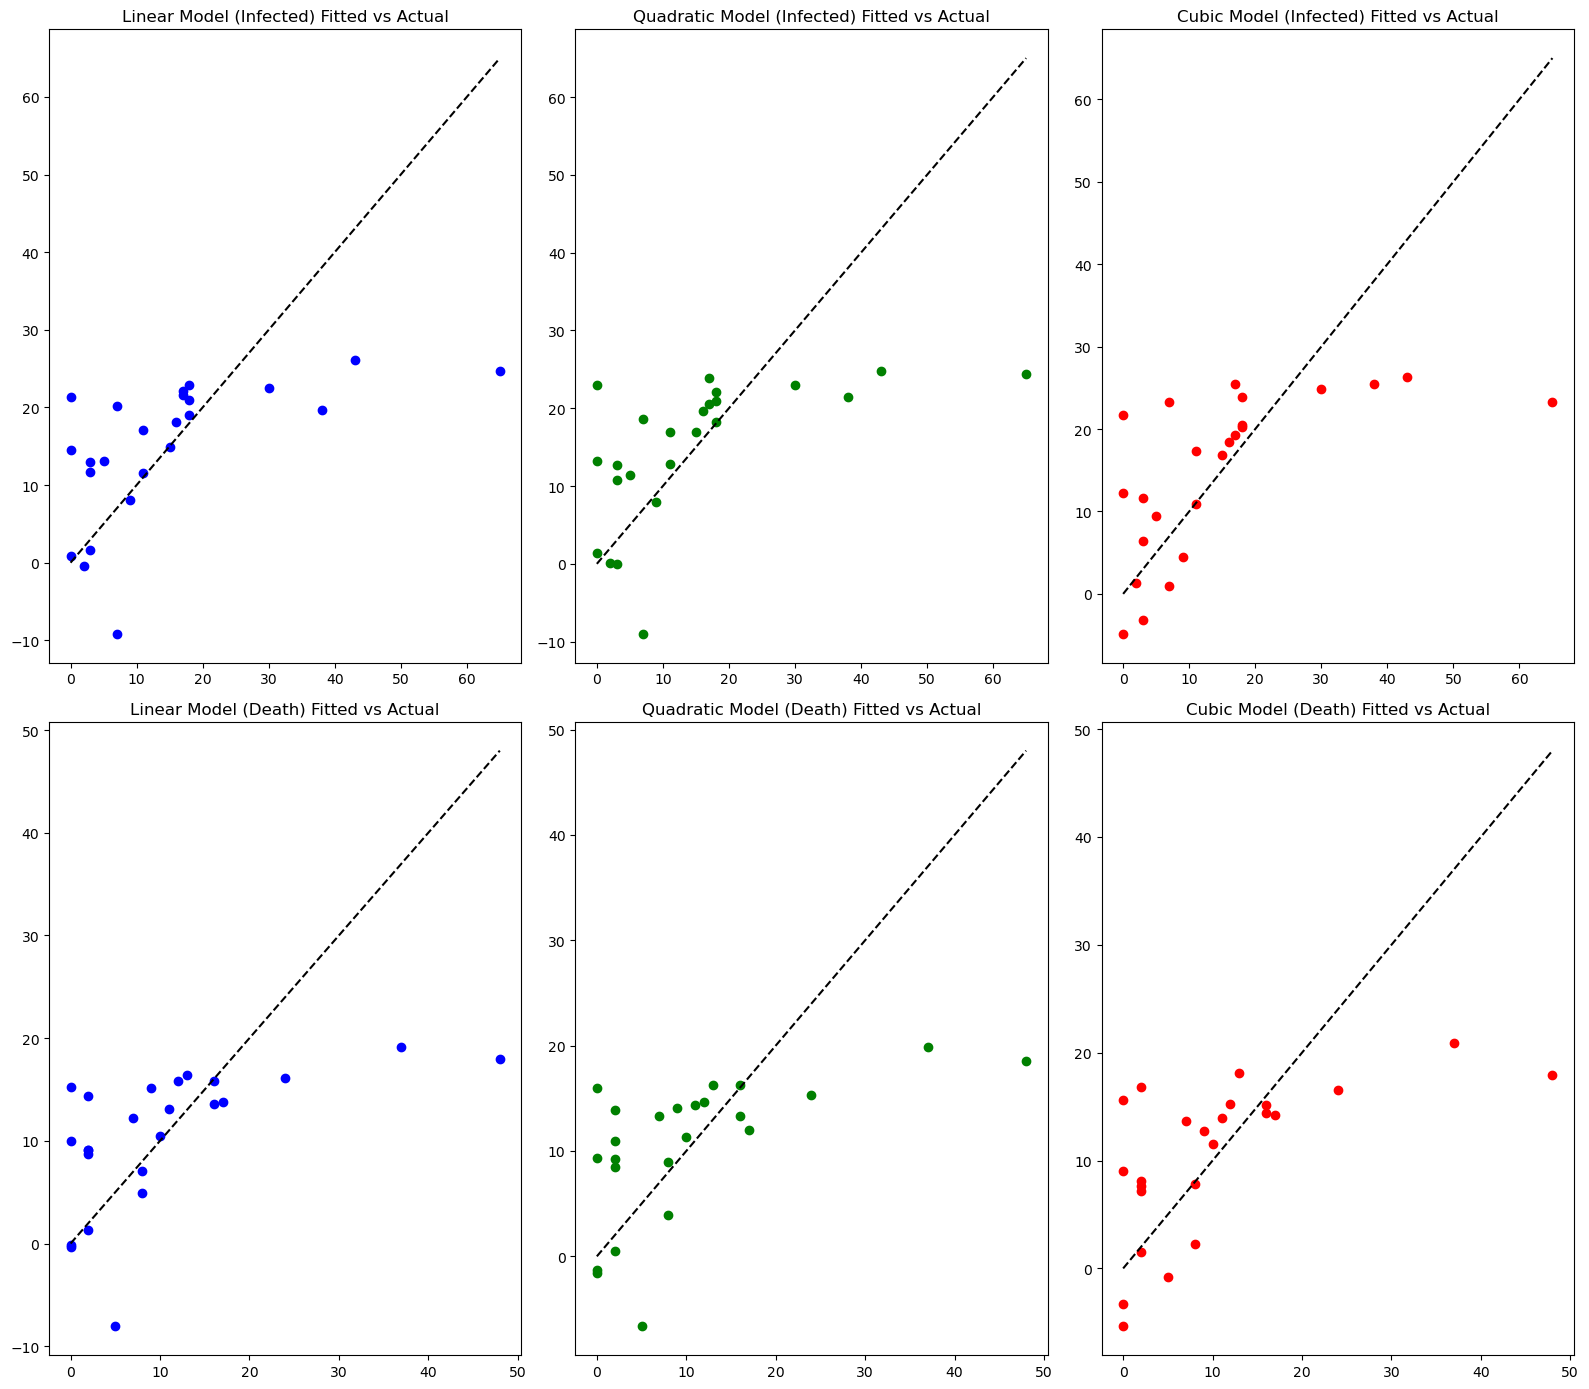

In [242]:
plt.figure(figsize=(16, 14))

#for infected

# Plot for Linear Model
plt.subplot(2, 3, 1)
plt.scatter(df['Infected'], linear_model.fittedvalues, color='blue')
plt.plot([min(df['Infected']), max(df['Infected'])], [min(df['Infected']), max(df['Infected'])], color='black', linestyle='--')
plt.title('Linear Model (Infected) Fitted vs Actual')

# Plot for Quadratic Model
plt.subplot(2, 3, 2)
plt.scatter(df['Infected'], quadratic_model.fittedvalues, color='green')
plt.plot([min(df['Infected']), max(df['Infected'])], [min(df['Infected']), max(df['Infected'])], color='black', linestyle='--')
plt.title('Quadratic Model (Infected) Fitted vs Actual')

# Plot for Cubic Model
plt.subplot(2, 3, 3)
plt.scatter(df['Infected'], cubic_model.fittedvalues, color='red')
plt.plot([min(df['Infected']), max(df['Infected'])], [min(df['Infected']), max(df['Infected'])], color='black', linestyle='--')
plt.title('Cubic Model (Infected) Fitted vs Actual')

# for death

# Plot for Linear Model
plt.subplot(2, 3, 4)
plt.scatter(df['Death'], linear_model_2.fittedvalues, color='blue')
plt.plot([min(df['Death']), max(df['Death'])], [min(df['Death']), max(df['Death'])], color='black', linestyle='--')
plt.title('Linear Model (Death) Fitted vs Actual')

# Plot for Quadratic Model
plt.subplot(2, 3, 5)
plt.scatter(df['Death'], quadratic_model_2.fittedvalues, color='green')
plt.plot([min(df['Death']), max(df['Death'])], [min(df['Death']), max(df['Death'])], color='black', linestyle='--')
plt.title('Quadratic Model (Death) Fitted vs Actual')

# Plot for Cubic Model
plt.subplot(2, 3, 6)
plt.scatter(df['Death'], cubic_model_2.fittedvalues, color='red')
plt.plot([min(df['Death']), max(df['Death'])], [min(df['Death']), max(df['Death'])], color='black', linestyle='--')
plt.title('Cubic Model (Death) Fitted vs Actual')

plt.tight_layout()
plt.show()


In [284]:

# predictions
infected_predictions = infected_model.predict(sm.add_constant(df[['Rainfall', 'Max T', 'Min T', 'Humidity']]))
death_predictions = death_model.predict(sm.add_constant(df[['Rainfall', 'Max T', 'Min T', 'Humidity']]))

# Residuals for Infected
infected_rsd = df['Infected'] - infected_predictions

# Residuals for Death
death_rsd = df['Death'] - death_predictions

# Ensure all are numpy arrays
inf= np.asarray(df['Infected'])
infected_predictions = np.asarray(infected_predictions)
dth =np.asarray(df['Death'])
death_predictions = np.asarray(death_predictions)
infected_rsd = np.asarray(infected_rsd)
death_rsd = np.asarray(death_rsd)

# Create a list of years from 2001 to 2024
years = list(range(2001, 2025))

# Create the DataFrame with predictions and set the index to the years
predictions_df = pd.DataFrame({
    'Actual Infected': inf,
    'Predicted Infected': infected_predictions,
    'Infected Residual': infected_rsd,
    'Actual Death': dth,
    'Predicted Death': death_predictions,
    'Death Residual': death_rsd
}, index=years)

# Display the DataFrame
print("Comparison of Infected and Death Counts from 2001 to 2024:")
print(predictions_df.round(1))


Comparison of Infected and Death Counts from 2001 to 2024:
      Actual Infected  Predicted Infected  Infected Residual  Actual Death  \
2001               16                14.7                1.3            11   
2002                0                20.5              -20.5             0   
2003               15                12.4                2.6            10   
2004               65                25.6               39.4            48   
2005               17                19.5               -2.5            16   
2006                0                12.4              -12.4             0   
2007               18                20.7               -2.7             9   
2008               11                14.7               -3.7             7   
2009                7                18.2              -11.2             2   
2010               18                14.7                3.3            16   
2011               43                24.7               18.3            37   
2012 

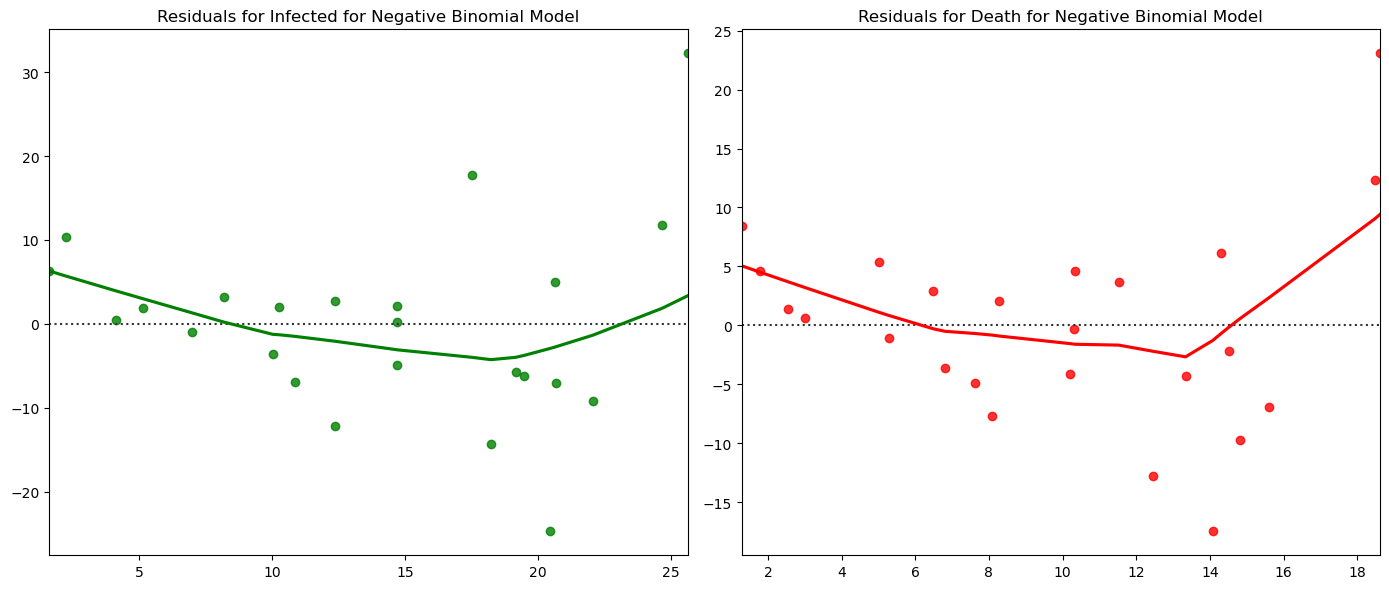

In [300]:
plt.figure(figsize=(14, 6))

# Residual plot for Infected
plt.subplot(1, 2, 1)
sns.residplot(x=infected_predictions, y=infected_rsd, lowess=True, color='green')
plt.title('Residuals for Infected for Negative Binomial Model')

# Residual plot for Death
plt.subplot(1, 2, 2)
sns.residplot(x=death_predictions, y=death_rsd, lowess=True, color='red')
plt.title('Residuals for Death for Negative Binomial Model')

plt.tight_layout()
plt.show()


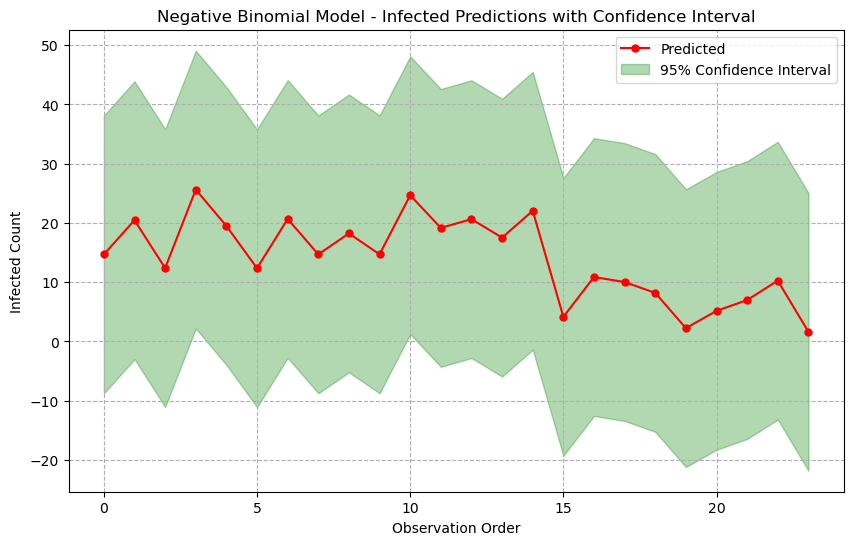

In [306]:

# Calculate the standard deviation of the residuals to get confidence intervals
predicted_infected = infected_model.fittedvalues
residual_std = (df['Infected'] - predicted_infected).std()

# Ensure lower_bound and upper_bound match the length of predicted_infected
lower_bound = predicted_infected - 1.96 * residual_std
upper_bound = predicted_infected + 1.96 * residual_std

# Plot predictions with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(predicted_infected, label='Predicted', color='red',marker='o', markersize=5)
plt.fill_between(range(len(predicted_infected)), lower_bound, upper_bound, color='green', alpha=0.3, label='95% Confidence Interval')

# Plot settings
plt.title('Negative Binomial Model - Infected Predictions with Confidence Interval')
plt.xlabel('Observation Order')
plt.ylabel('Infected Count')
plt.legend()
plt.grid(axis='both', linestyle='--', alpha= 1)
plt.show()
#print(residual_std)

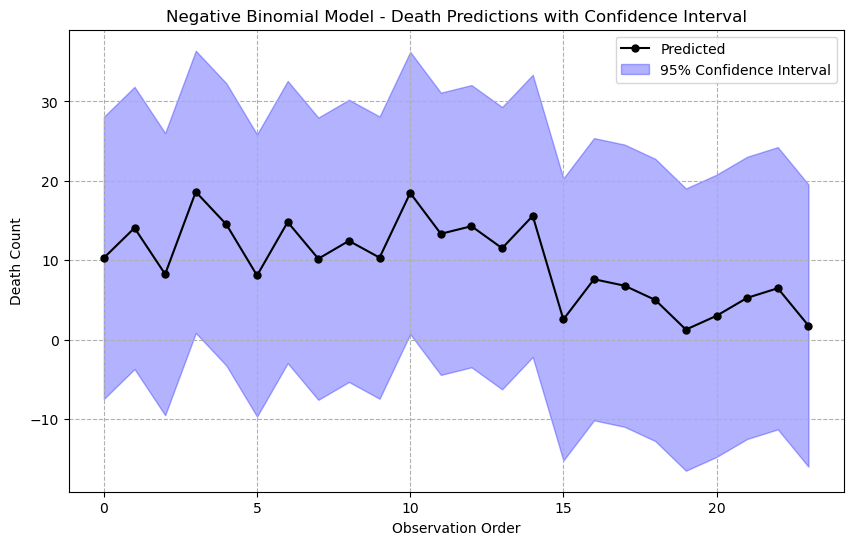

In [304]:
# Calculate the standard deviation of the residuals to get confidence intervals
predicted_death = death_model.fittedvalues
residual_std = (df['Death'] - predicted_death).std()

# Ensure lower_bound and upper_bound match the length of predicted_infected
lower_bound = predicted_death - 1.96 * residual_std
upper_bound = predicted_death + 1.96 * residual_std

# Plot predictions with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(predicted_death, label='Predicted', color='black', marker='o', markersize=5)
plt.fill_between(range(len(predicted_death)), lower_bound, upper_bound, color='blue', alpha=0.3, label='95% Confidence Interval')

# Plot settings
plt.title('Negative Binomial Model - Death Predictions with Confidence Interval')
plt.xlabel('Observation Order')
plt.ylabel('Death Count')
plt.legend()
plt.grid(axis='both', linestyle='--', alpha= 1)
plt.show()
#print(residual_std)

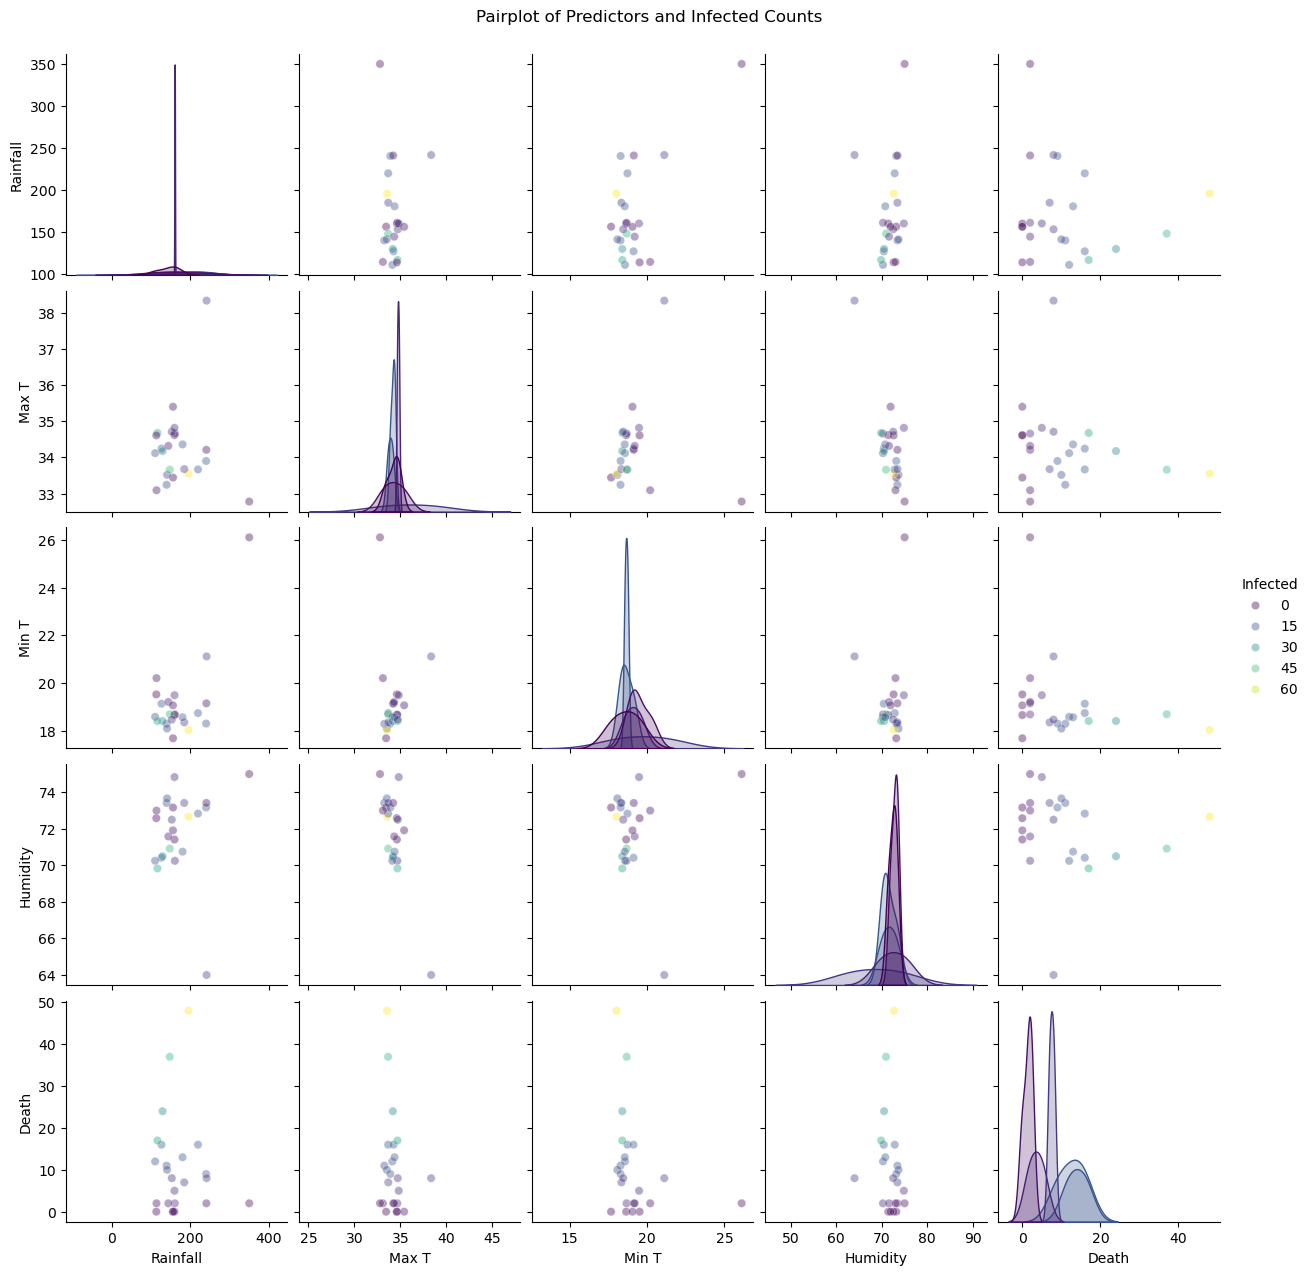

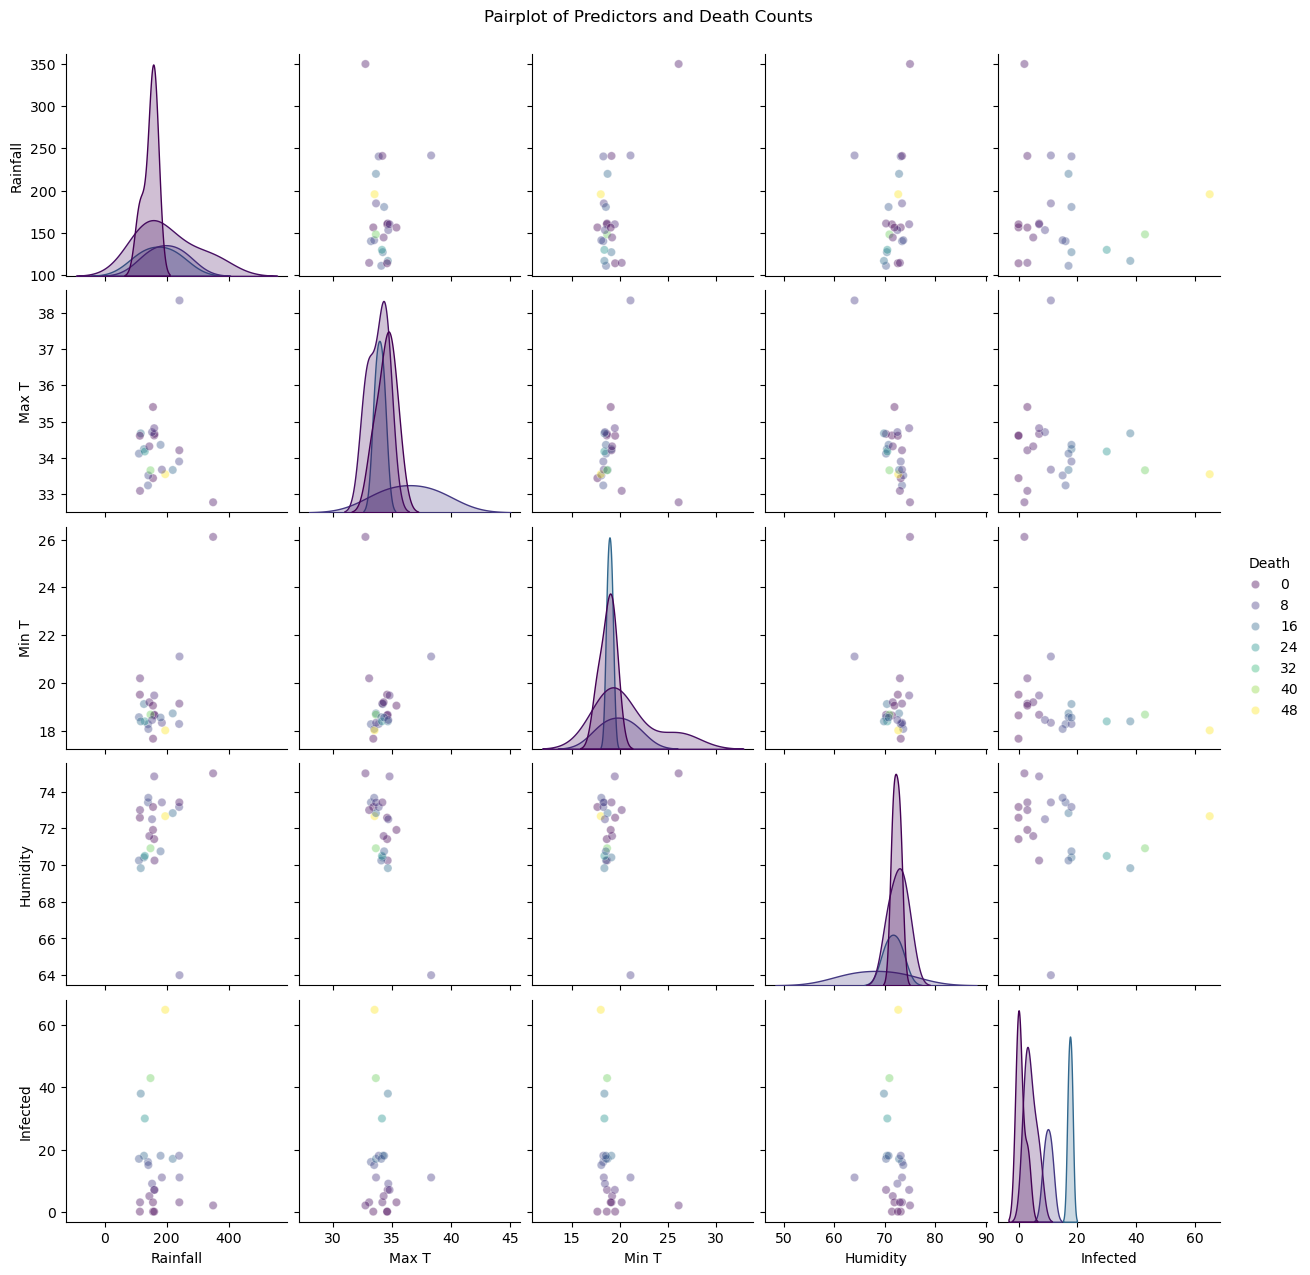

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only relevant columns (predictors and target variables)
subset_df = df[['Rainfall', 'Max T', 'Min T', 'Humidity', 'Infected', 'Death']]

# Create pairplot for Infected
sns.pairplot(subset_df, hue='Infected', palette='viridis', plot_kws={'alpha': 0.4})
plt.suptitle('Pairplot of Predictors and Infected Counts', y=1.02)
plt.show()

# Create pairplot for Death
sns.pairplot(subset_df, hue='Death', palette='viridis', plot_kws={'alpha': 0.4})
plt.suptitle('Pairplot of Predictors and Death Counts', y=1.02)
plt.show()


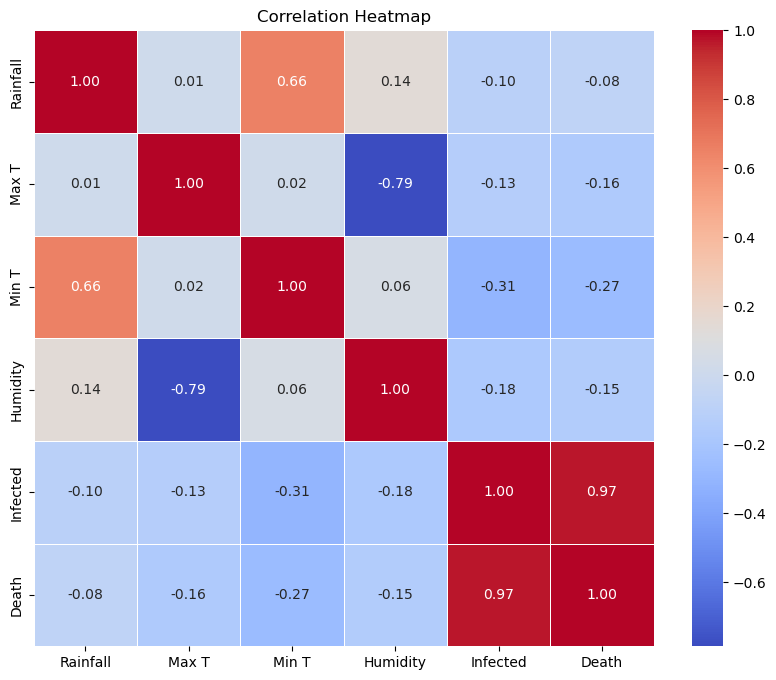

In [316]:
# Compute the correlation matrix
correlation_matrix = df[['Rainfall', 'Max T', 'Min T', 'Humidity', 'Infected', 'Death']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [322]:
from scipy import stats

# Z-Score method
df['Infected Z-Score'] = np.abs(stats.zscore(df['Infected']))
df['Death Z-Score'] = np.abs(stats.zscore(df['Death']))

# Identify outliers
df['Infected Outliers'] = df['Infected Z-Score'] > 3
df['Death Outliers'] = df['Death Z-Score'] > 3

# Display rows with outliers
outliers_df = df[(df['Infected Outliers']) | (df['Death Outliers'])]
print(outliers_df[['Year', 'Infected', 'Death', 'Infected Outliers', 'Death Outliers']])


   Year  Infected  Death  Infected Outliers  Death Outliers
3  2004        65     48               True            True


In [324]:
from sklearn.ensemble import IsolationForest

# Prepare data for Isolation Forest
data = df[['Infected', 'Death']].dropna()  # Ensure no NaNs

# Fit Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # 5% contamination for outlier detection
outlier_labels = iso_forest.fit_predict(data)

# -1 for outliers, 1 for inliers
df['Infected Outliers'] = outlier_labels == -1
df['Death Outliers'] = outlier_labels == -1  # same label for demonstration

# Display rows with outliers
outliers_df = df[(df['Infected Outliers']) | (df['Death Outliers'])]
print(outliers_df[['Year', 'Infected', 'Death', 'Infected Outliers', 'Death Outliers']])


    Year  Infected  Death  Infected Outliers  Death Outliers
3   2004        65     48               True            True
10  2011        43     37               True            True


In [326]:
# Modified Z-Score method
def modified_z_score(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    return 0.6745 * (data - median) / mad

# Calculate modified Z-scores
df['Infected Modified Z-Score'] = modified_z_score(df['Infected'])
df['Death Modified Z-Score'] = modified_z_score(df['Death'])

# Identify outliers
df['Infected Outliers'] = np.abs(df['Infected Modified Z-Score']) > 3.5
df['Death Outliers'] = np.abs(df['Death Modified Z-Score']) > 3.5

# Display rows with outliers
outliers_df = df[(df['Infected Outliers']) | (df['Death Outliers'])]
print(outliers_df[['Year', 'Infected', 'Death', 'Infected Outliers', 'Death Outliers']])


   Year  Infected  Death  Infected Outliers  Death Outliers
3  2004        65     48               True            True


In [328]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with predictor variables
X = df[['Rainfall', 'Max T', 'Min T', 'Humidity']]

# Add constant to predictor variables for intercept
X = sm.add_constant(X)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


   Variable           VIF
0     const  10718.867244
1  Rainfall      1.844660
2     Max T      2.714627
3     Min T      1.767523
4  Humidity      2.770422
